In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income_30K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '9d17684e-3341-47be-8c98-934c7ae3a99f'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(38, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-24 22:04:48.922,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.798579,1.000000,0.000000,0.849846,1.000000,0.000000,0.769366,1.000000,0.000000,0.808600
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-24 22:04:48.927,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.733441,1.000000,0.000000,0.746995,1.000000,0.000000,0.728148,1.000000,0.000000,0.737400
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-24 22:04:48.922,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.621390,0.569409,0.827481,0.577183,0.533829,0.822558,0.638642,0.582806,0.824905,0.608681
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-24 22:04:48.927,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.640135,0.580058,0.805436,0.618785,0.558196,0.797674,0.643153,0.581892,0.807239,0.631191
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-24 22:04:48.922,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.642657,1.000000,0.000000,0.612288,1.000000,0.000000,0.652965,1.000000,0.000000,0.638459
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-24 22:04:48.927,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.674464,1.000000,0.000000,0.623864,1.000000,0.000000,0.696091,1.000000,0.000000,0.665733
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-24 22:04:48.922,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.433310,0.000000,1.000000,0.442085,0.000000,1.000000,0.433809,0.000000,1.000000,0.436667
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-24 22:04:48.927,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.446065,0.000000,1.000000,0.501693,0.000000,1.000000,0.419414,0.000000,1.000000,0.454868
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,0,OK,2023-10-24 22:04:48.922,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.092491,0.000000,1.000000,0.071373,0.000000,1.000000,0.104397,0.000000,1.000000,0.086286
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,5,1,OK,2023-10-24 22:04:48.927,9d17684e-3341-47be-8c98-934c7ae3a99f,Exp_iter_1,...,0.088127,0.000000,1.000000,0.072132,0.000000,1.000000,0.101228,0.000000,1.000000,0.085335


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.791361,1.000000,0.000000,0.845744,1.000000,0.000000,0.761366,1.000000,0.000000,0.802500
24,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.670083,0.621283,0.855181,0.636067,0.595233,0.859948,0.683701,0.631712,0.849572,0.660479
48,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.620279,1.000000,0.000000,0.595264,1.000000,0.000000,0.631516,1.000000,0.000000,0.618505
72,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.466831,0.000000,1.000000,0.466216,0.000000,1.000000,0.466395,0.000000,1.000000,0.466333
96,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.087353,0.000000,1.000000,0.070070,0.000000,1.000000,0.097121,0.000000,1.000000,0.082286
120,IQR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.083245,0.075960,0.110875,0.076499,0.070406,0.109904,0.086182,0.078620,0.110310,0.081462
144,Jitter,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.090939,0.065327,0.188086,0.072301,0.051154,0.188243,0.099846,0.073481,0.183963,0.086417
168,Label_Stability,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.870034,0.908040,0.725876,0.897202,0.928751,0.724229,0.857368,0.896289,0.733189,0.876787
192,Mean,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.690348,0.715111,0.596425,0.734682,0.762737,0.580861,0.666719,0.685536,0.606682,0.699851
216,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-23 00:13:39.670,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.687507,0.637245,0.878148,0.651890,0.609865,0.882304,0.701837,0.648344,0.872505,0.677488


In [12]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.737134,1.000000,0.000000,0.754125,1.000000,0.000000,0.728148,1.000000,0.000000,0.740900
25,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.690982,0.639314,0.835868,0.674809,0.623176,0.833174,0.691452,0.637971,0.834699,0.683282
49,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.680326,1.000000,0.000000,0.639379,1.000000,0.000000,0.696358,1.000000,0.000000,0.672233
73,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.438889,0.000000,1.000000,0.482342,0.000000,1.000000,0.418681,0.000000,1.000000,0.446112
97,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.087897,0.000000,1.000000,0.073892,0.000000,1.000000,0.102075,0.000000,1.000000,0.086681
121,IQR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.085060,0.078490,0.103482,0.082235,0.075630,0.102496,0.085363,0.078458,0.103856,0.083828
145,Jitter,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.096006,0.072787,0.161117,0.089186,0.067181,0.156679,0.097627,0.072642,0.164549,0.093484
169,Label_Stability,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.863255,0.897841,0.766269,0.873259,0.905719,0.773703,0.860748,0.898168,0.760520,0.866890
193,Mean,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.631722,0.631694,0.631803,0.674051,0.688046,0.631125,0.610361,0.603412,0.628973,0.641626
217,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-23 00:13:39.682,fa8d64fb-e05a-4ac3-aa28-f1c2bd01d261,Exp_iter_1,...,0.708538,0.655768,0.856517,0.691734,0.638990,0.853503,0.709112,0.654444,0.855538,0.700581


In [11]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.000179,-0.070937,0.009000,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.027051,-0.030471,-0.036681,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,-0.000179,0.070937,-0.009000,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.150043,0.975315,1.164400,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.103518,-0.017975,0.118224,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.084378,0.056998,0.098312,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.046461,1.055704,1.068508,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.009683,-0.013787,-0.015740,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.006397,-0.009769,-0.010950,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.896627,0.839406,0.817516,RandomForestClassifier,Exp_iter_1,0.7,0


In [15]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.000179,-0.070937,0.009000,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.027051,-0.030471,-0.036681,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,-0.000179,0.070937,-0.009000,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.150043,0.975315,1.164400,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.103518,-0.017975,0.118224,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [12]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [13]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

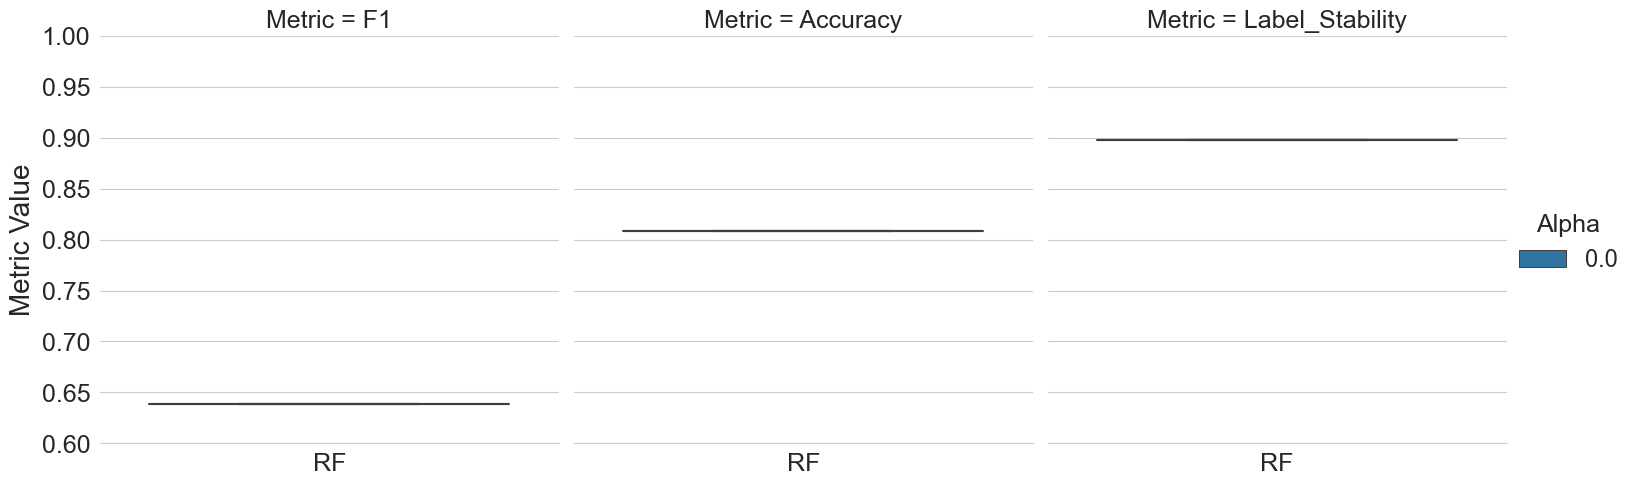

In [14]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

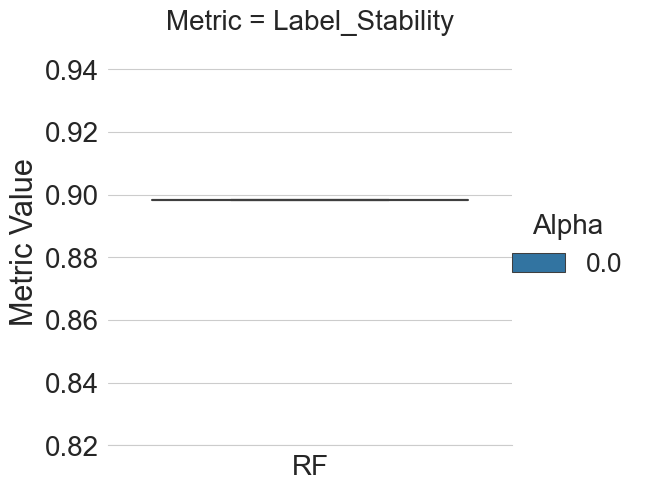

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

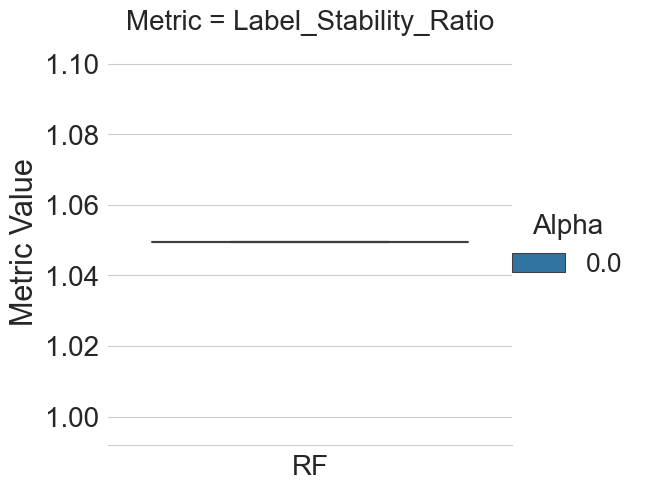

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

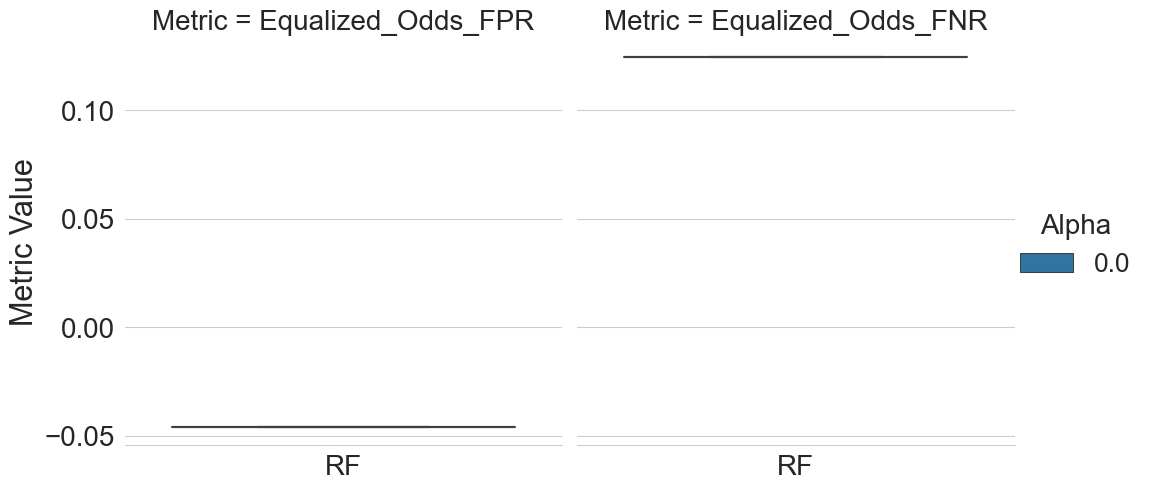

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [18]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 1200x600 with 0 Axes>

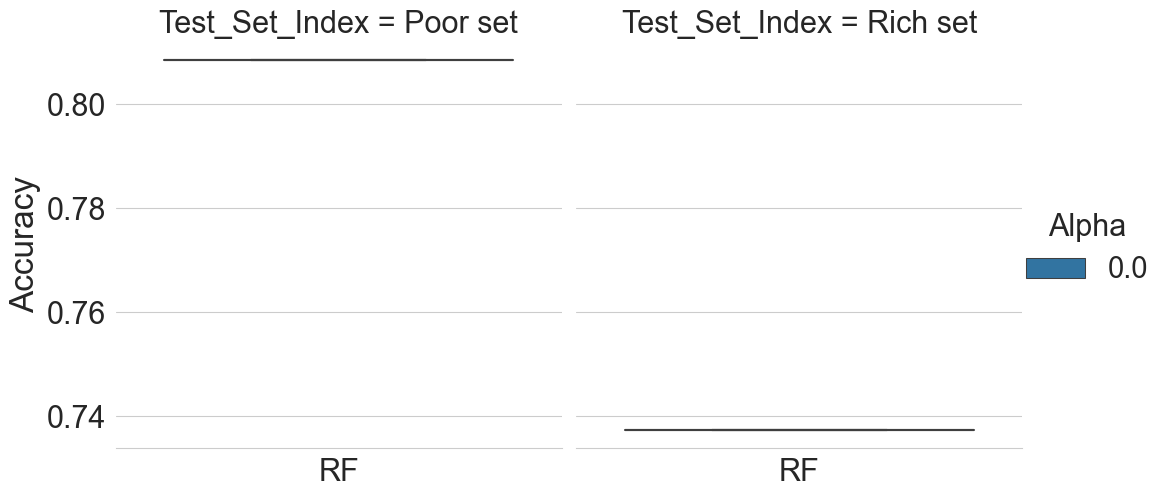

In [19]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

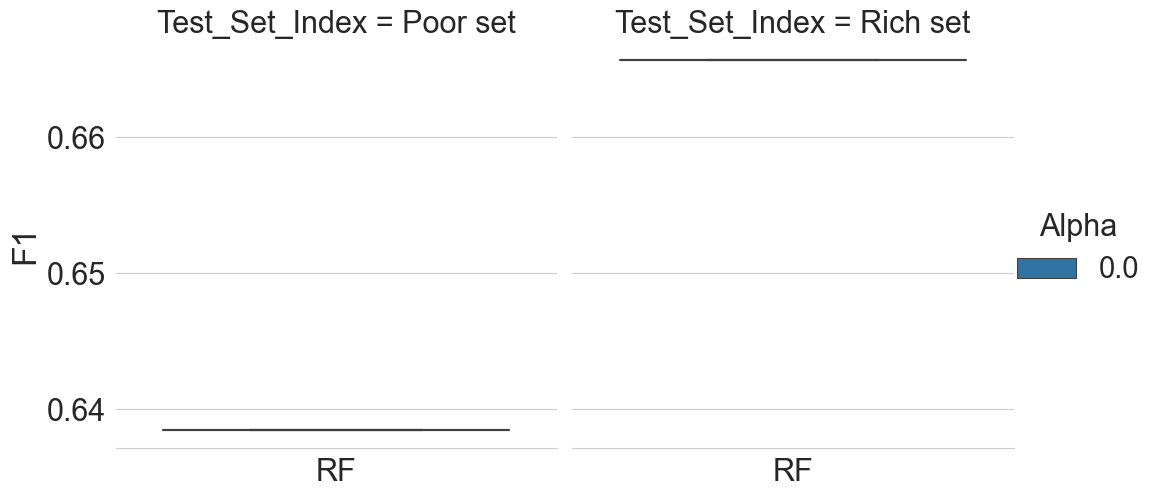

In [20]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

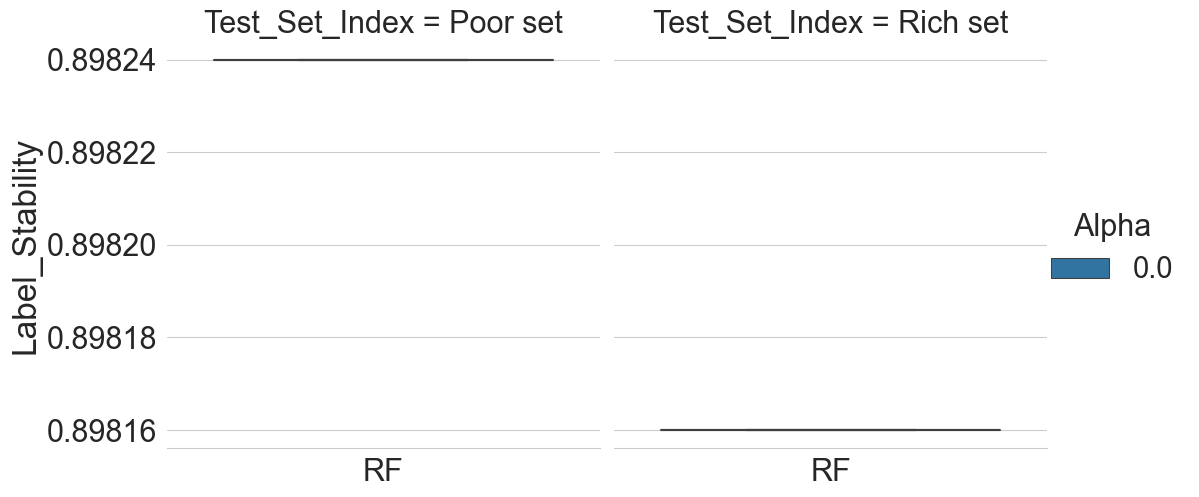

In [21]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

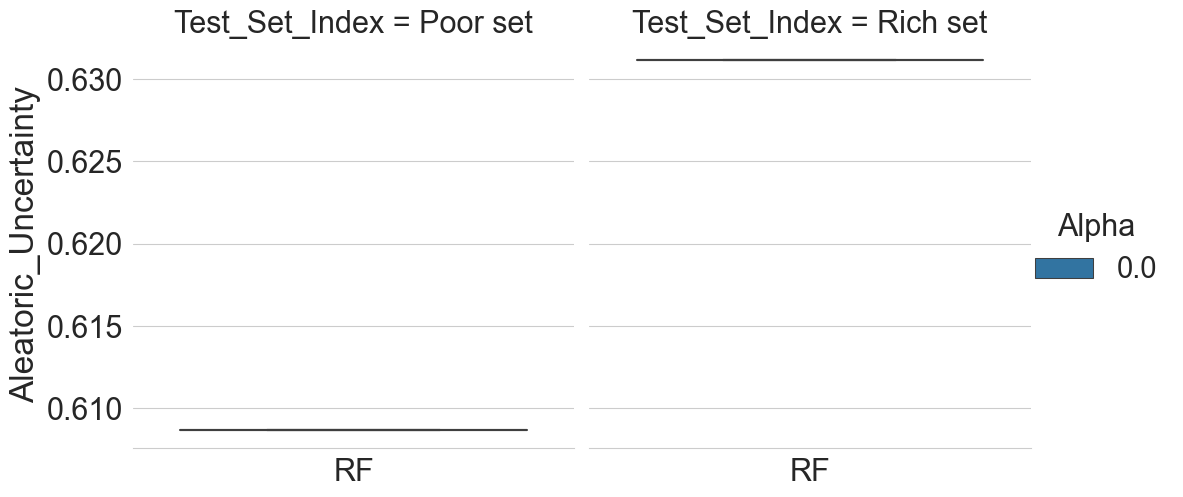

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

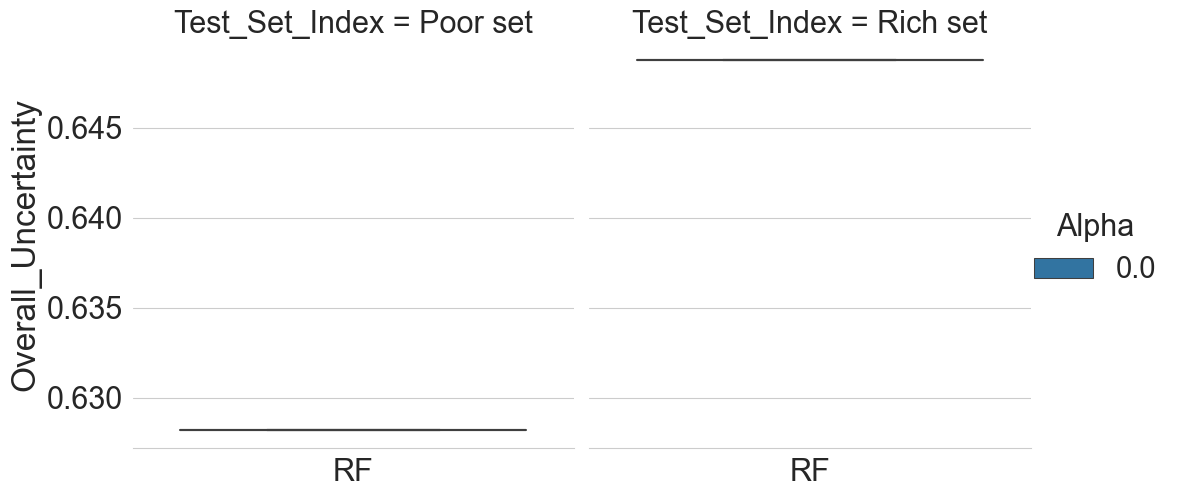

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

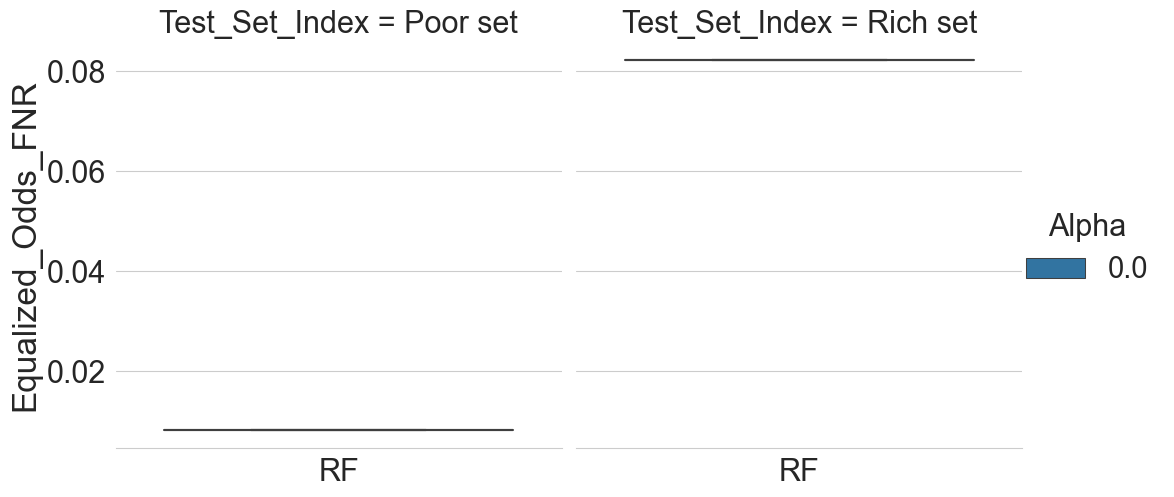

In [24]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

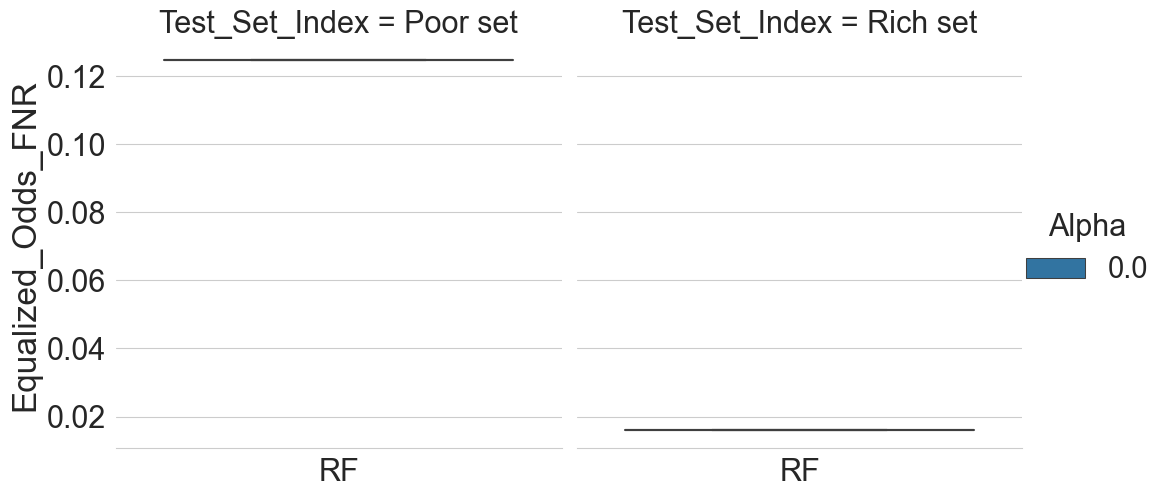

In [25]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

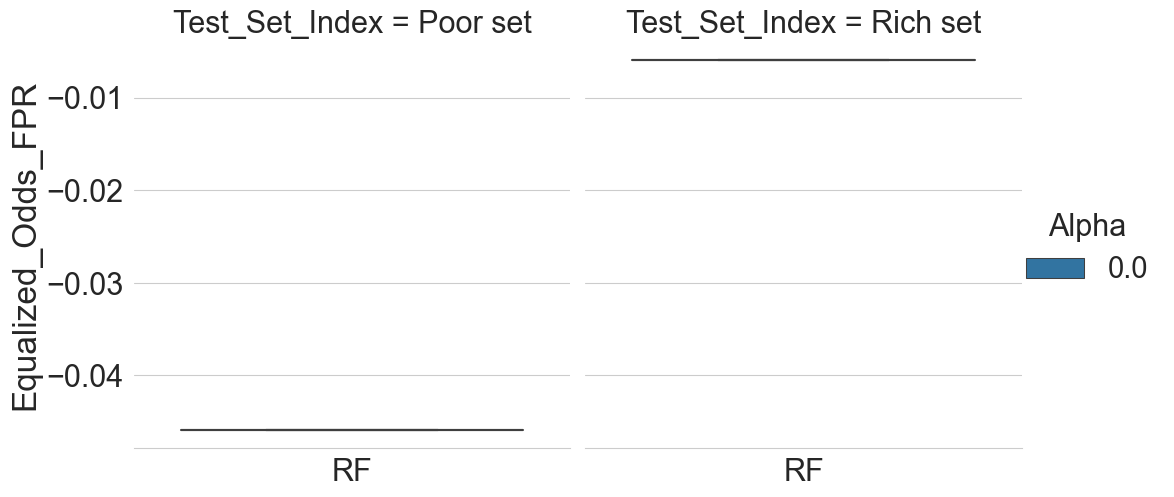

In [26]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)